##**Named Entity Recognition from CoVID Related Research Articles**





Dataset

In [ ]:
## https://data.world/kgarrett/covid-19-open-research-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid_research_articles.csv')
df_ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ner_dataset_cov.csv',encoding="latin1")
df

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text
0,c630ebcdf30652f0422c3ec12a00b50241dc9bd9,CZI,Angiotensin-converting enzyme 2 (ACE2) as a SA...,10.1007/s00134-020-05985-9,NaN,32125455.0,cc-by-nc,NaN,2020,"Zhang, Haibo; Penninger, Josef M.; Li, Yimin; ...",Intensive Care Med,2.002765e+09,#3252,True
1,53eccda7977a31e3d0f565c884da036b1e85438e,CZI,Comparative genetic analysis of the novel coro...,10.1038/s41421-020-0147-1,NaN,NaN,cc-by,NaN,2020,"Cao, Yanan; Li, Lin; Feng, Zhimin; Wan, Shengq...",Cell Discovery,3.003431e+09,#1861,True
2,210a892deb1c61577f6fba58505fd65356ce6636,CZI,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,NaN,NaN,cc-by,The geographic spread of 2019 novel coronaviru...,2020,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine,3.006065e+09,#1043,True
3,e3b40cc8e0e137c416b4a2273a4dca94ae8178cc,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,NaN,32093211.0,cc-by,"In December 2019, cases of unidentified pneumo...",2020,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med,1.776631e+08,#1999,True
4,92c2c9839304b4f2bc1276d41b1aa885d8b364fd,CZI,Imaging changes in severe COVID-19 pneumonia,10.1007/s00134-020-05976-w,NaN,32125453.0,cc-by-nc,NaN,2020,"Zhang, Wei",Intensive Care Med,3.006643e+09,#3242,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29495,c42a617a00afe6a36bde0a8e3638e0f55bfee4f7,medrxiv,Prediction of COVID-19 Spreading Profiles in S...,doi.org/10.1101/2020.03.08.20032847,NaN,NaN,See https://www.medrxiv.org/submit-a-manuscript,<jats:p>This work applies a data-driven coding...,2020-03-10,"['Choujun Zhan', 'Chi K. Tse', 'Zhikang Lai', ...",NaN,NaN,NaN,True
29496,c4ce14ce42fa4360dfe3515ec9d1584847381c27,medrxiv,A deterministic epidemic model for the emergen...,doi.org/10.1101/2020.03.08.20032854,NaN,NaN,See https://www.medrxiv.org/submit-a-manuscript,<jats:p>Coronavirus disease (COVID-19) broke o...,2020-03-10,"['Meng Wang', 'Jingtao Qi']",NaN,NaN,NaN,True
29497,c41e09a32be90c84cea0616bb1c726aecba721e0,medrxiv,Data-driven discovery of clinical routes for s...,doi.org/10.1101/2020.03.09.20032219,NaN,NaN,See https://www.medrxiv.org/submit-a-manuscript,<jats:p>The outbreak of COVID-19 epidemic has ...,2020-03-10,"['Hui Yu', 'Jianbo Shao', 'Yuqi Guo', 'Yun Xia...",NaN,NaN,NaN,False
29498,ca88735399ff43d0e673876200655099f06f5567,medrxiv,Ascertainment rate of novel coronavirus diseas...,doi.org/10.1101/2020.03.09.20033183,NaN,NaN,See https://www.medrxiv.org/submit-a-manuscript,<jats:p>We analyzed the epidemiological datase...,2020-03-10,"['Ryosuke Omori', 'Kenji Mizumoto', 'Hiroshi N...",NaN,NaN,NaN,True


In [ ]:
df.shape

(29500, 14)

##**Pre-Processing**

In [ ]:
print(df.isna().sum()/len(df)*100)
print(df.isna().sum().sum())

sha                            40.949153
source_x                        0.000000
title                           0.030508
doi                            10.654237
pmcid                           7.332203
pubmed_id                      43.288136
license                        40.027119
abstract                        8.783051
publish_time                   36.935593
authors                         2.023729
journal                        39.691525
Microsoft Academic Paper ID    96.155932
WHO #Covidence                 95.810169
has_full_text                  40.949153
dtype: float64
136476


In [ ]:
df.drop(['pmcid','sha','authors','WHO #Covidence','Microsoft Academic Paper ID'],axis=1,inplace=True) #removed unnecessary columns

In [ ]:
df

,source_x,title,doi,pubmed_id,license,abstract,publish_time,journal,has_full_text
0,CZI,Angiotensin-converting enzyme 2 (ACE2) as a SA...,10.1007/s00134-020-05985-9,32125455.0,cc-by-nc,NaN,2020,Intensive Care Med,True
1,CZI,Comparative genetic analysis of the novel coro...,10.1038/s41421-020-0147-1,NaN,cc-by,NaN,2020,Cell Discovery,True
2,CZI,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,NaN,cc-by,The geographic spread of 2019 novel coronaviru...,2020,Journal of Clinical Medicine,True
3,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,32093211.0,cc-by,"In December 2019, cases of unidentified pneumo...",2020,J Clin Med,True
4,CZI,Imaging changes in severe COVID-19 pneumonia,10.1007/s00134-020-05976-w,32125453.0,cc-by-nc,NaN,2020,Intensive Care Med,False
...,...,...,...,...,...,...,...,...,...
29495,medrxiv,Prediction of COVID-19 Spreading Profiles in S...,doi.org/10.1101/2020.03.08.20032847,NaN,See https://www.medrxiv.org/submit-a-manuscript,<jats:p>This work applies a data-driven coding...,2020-03-10,NaN,True
29496,medrxiv,A deterministic epidemic model for the emergen...,doi.org/10.1101/2020.03.08.20032854,NaN,See https://www.medrxiv.org/submit-a-manuscript,<jats:p>Coronavirus disease (COVID-19) broke o...,2020-03-10,NaN,True
29497,medrxiv,Data-driven discovery of clinical routes for s...,doi.org/10.1101/2020.03.09.20032219,NaN,See https://www.medrxiv.org/submit-a-manuscript,<jats:p>The outbreak of COVID-19 epidemic has ...,2020-03-10,NaN,False
29498,medrxiv,Ascertainment rate of novel coronavirus diseas...,doi.org/10.1101/2020.03.09.20033183,NaN,See https://www.medrxiv.org/submit-a-manuscript,<jats:p>We analyzed the epidemiological datase...,2020-03-10,NaN,True


In [ ]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [ ]:
df = df.iloc[:,1:]
df

,source_x,title,doi,pubmed_id,license,abstract,publish_time,journal,has_full_text
0,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,32093211.0,cc-by,"In December 2019, cases of unidentified pneumo...",2020,J Clin Med,True
1,CZI,Genome Detective Coronavirus Typing Tool for r...,10.1093/bioinformatics/btaa145,32108862.0,cc-by-nc,"SUMMARY: Genome Detective is a web-based, user...",2020,"Bioinformatics (Oxford, England)",True
2,CZI,Optimization Method for Forecasting Confirmed ...,10.3390/jcm9030674,32131537.0,cc-by,"In December 2019, a novel coronavirus, called ...",2020,J Clin Med,True
3,CZI,Passengers' destinations from China: low risk ...,10.1017/S0950268820000424,32100667.0,cc-by,Novel Coronavirus (2019-nCoV [SARS-COV-2]) was...,2020,Epidemiol Infect,True
4,CZI,A new coronavirus associated with human respir...,10.1038/s41586-020-2008-3,32015508.0,cc-by,"Emerging infectious diseases, such as SARS and...",2020,Nature,True
...,...,...,...,...,...,...,...,...,...
15181,PMC,Middle East Respiratory Syndrome Coronavirus T...,http://dx.doi.org/10.3201/eid2602.190697,31961300.0,NO-CC CODE,Middle East respiratory syndrome coronavirus (...,2020 Feb,Emerg Infect Dis,True
15182,PMC,Middle East Respiratory Syndrome Coronavirus T...,http://dx.doi.org/10.3201/eid2602.190697,31961300.0,NO-CC CODE,Middle East respiratory syndrome coronavirus (...,2020 Feb,Emerg Infect Dis,False
15183,PMC,Pseudoscience in medicine: cautionary recommen...,http://dx.doi.org/10.4314/ahs.v19i4.34,32127888.0,NO-CC CODE,INTRODUCTION: Certain real life applications o...,2019 Dec,Afr Health Sci,True
15184,PMC,A 25-Year-Old Sample Contributes the Complete ...,http://dx.doi.org/10.1128/MRA.00067-20,32107295.0,NO-CC CODE,"Here, we report the complete genome sequence o...",2020 Feb 27,Microbiol Resour Announc,True


In [ ]:
pd.unique(df['source_x'])

array(['CZI', 'PMC'], dtype=object)

In [ ]:
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce') #converting str to datatime
df

,source_x,title,doi,pubmed_id,license,abstract,publish_time,journal,has_full_text
0,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,32093211.0,cc-by,"In December 2019, cases of unidentified pneumo...",2020-01-01,J Clin Med,True
1,CZI,Genome Detective Coronavirus Typing Tool for r...,10.1093/bioinformatics/btaa145,32108862.0,cc-by-nc,"SUMMARY: Genome Detective is a web-based, user...",2020-01-01,"Bioinformatics (Oxford, England)",True
2,CZI,Optimization Method for Forecasting Confirmed ...,10.3390/jcm9030674,32131537.0,cc-by,"In December 2019, a novel coronavirus, called ...",2020-01-01,J Clin Med,True
3,CZI,Passengers' destinations from China: low risk ...,10.1017/S0950268820000424,32100667.0,cc-by,Novel Coronavirus (2019-nCoV [SARS-COV-2]) was...,2020-01-01,Epidemiol Infect,True
4,CZI,A new coronavirus associated with human respir...,10.1038/s41586-020-2008-3,32015508.0,cc-by,"Emerging infectious diseases, such as SARS and...",2020-01-01,Nature,True
...,...,...,...,...,...,...,...,...,...
15181,PMC,Middle East Respiratory Syndrome Coronavirus T...,http://dx.doi.org/10.3201/eid2602.190697,31961300.0,NO-CC CODE,Middle East respiratory syndrome coronavirus (...,2020-02-01,Emerg Infect Dis,True
15182,PMC,Middle East Respiratory Syndrome Coronavirus T...,http://dx.doi.org/10.3201/eid2602.190697,31961300.0,NO-CC CODE,Middle East respiratory syndrome coronavirus (...,2020-02-01,Emerg Infect Dis,False
15183,PMC,Pseudoscience in medicine: cautionary recommen...,http://dx.doi.org/10.4314/ahs.v19i4.34,32127888.0,NO-CC CODE,INTRODUCTION: Certain real life applications o...,2019-12-01,Afr Health Sci,True
15184,PMC,A 25-Year-Old Sample Contributes the Complete ...,http://dx.doi.org/10.1128/MRA.00067-20,32107295.0,NO-CC CODE,"Here, we report the complete genome sequence o...",2020-02-27,Microbiol Resour Announc,True


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
'''
df.drop(['pmcid','sha','authors','WHO #Covidence','Microsoft Academic Paper ID'],axis=1,inplace=True) #removed unnecessary columns
df.dropna(inplace=True) #dropped null values
df.reset_index(inplace=True) # reset index
df = df.iloc[:,1:] #removed index column
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce') #converting str to datatime
df.drop_duplicates(inplace=True) #drop duplicate values
df
'''

"\ndf.drop(['pmcid','sha','authors','WHO #Covidence','Microsoft Academic Paper ID'],axis=1,inplace=True) #removed unnecessary columns\ndf.dropna(inplace=True) #dropped null values\ndf.reset_index(inplace=True) # reset index\ndf = df.iloc[:,1:] #removed index column\ndf['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce') #converting str to datatime\ndf.drop_duplicates(inplace=True) #drop duplicate values\ndf\n"

In [ ]:
df

,source_x,title,doi,pubmed_id,license,abstract,publish_time,journal,has_full_text
0,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,32093211.0,cc-by,"In December 2019, cases of unidentified pneumo...",2020-01-01,J Clin Med,True
1,CZI,Genome Detective Coronavirus Typing Tool for r...,10.1093/bioinformatics/btaa145,32108862.0,cc-by-nc,"SUMMARY: Genome Detective is a web-based, user...",2020-01-01,"Bioinformatics (Oxford, England)",True
2,CZI,Optimization Method for Forecasting Confirmed ...,10.3390/jcm9030674,32131537.0,cc-by,"In December 2019, a novel coronavirus, called ...",2020-01-01,J Clin Med,True
3,CZI,Passengers' destinations from China: low risk ...,10.1017/S0950268820000424,32100667.0,cc-by,Novel Coronavirus (2019-nCoV [SARS-COV-2]) was...,2020-01-01,Epidemiol Infect,True
4,CZI,A new coronavirus associated with human respir...,10.1038/s41586-020-2008-3,32015508.0,cc-by,"Emerging infectious diseases, such as SARS and...",2020-01-01,Nature,True
...,...,...,...,...,...,...,...,...,...
15181,PMC,Middle East Respiratory Syndrome Coronavirus T...,http://dx.doi.org/10.3201/eid2602.190697,31961300.0,NO-CC CODE,Middle East respiratory syndrome coronavirus (...,2020-02-01,Emerg Infect Dis,True
15182,PMC,Middle East Respiratory Syndrome Coronavirus T...,http://dx.doi.org/10.3201/eid2602.190697,31961300.0,NO-CC CODE,Middle East respiratory syndrome coronavirus (...,2020-02-01,Emerg Infect Dis,False
15183,PMC,Pseudoscience in medicine: cautionary recommen...,http://dx.doi.org/10.4314/ahs.v19i4.34,32127888.0,NO-CC CODE,INTRODUCTION: Certain real life applications o...,2019-12-01,Afr Health Sci,True
15184,PMC,A 25-Year-Old Sample Contributes the Complete ...,http://dx.doi.org/10.1128/MRA.00067-20,32107295.0,NO-CC CODE,"Here, we report the complete genome sequence o...",2020-02-27,Microbiol Resour Announc,True


In [ ]:
print(df.isna().sum(),"\n")
print('The Total No.of Null Values',df.isna().sum().sum())

source_x         0
title            0
doi              0
pubmed_id        0
license          0
abstract         0
publish_time     0
journal          0
has_full_text    0
dtype: int64 

The Total No.of Null Values 0


**Removing Punctuation**

In [ ]:
import re
import string
import math
df['title']=df['title'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
df['abstract']=df['abstract'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
df['title']=df['title'].apply(lambda x: re.sub('\w*\d\w*','', x))
df['abstract']=df['abstract'].apply(lambda x: re.sub('\w*\d\w*','', x))
df['abstract']=df['abstract'].apply(lambda x: x.lower())
df['title']=df['title'].apply(lambda x: x.lower())


**Removal of stopwords and lemmatization.**

In [ ]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['title']=df['title'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
df['abstract']=df['abstract'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [ ]:
temp_df = pd.to_datetime(df['publish_time'].dropna(), errors='coerce').to_frame() #converting str to datatime fromat and making it as a new dataframe
temp_df.set_index('publish_time',inplace=True)
temp_df.sort_index(inplace=True)

In [ ]:
temp_df = temp_df.resample('M').size().to_frame() #resampling by month
temp_df = temp_df[temp_df[0]!=0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


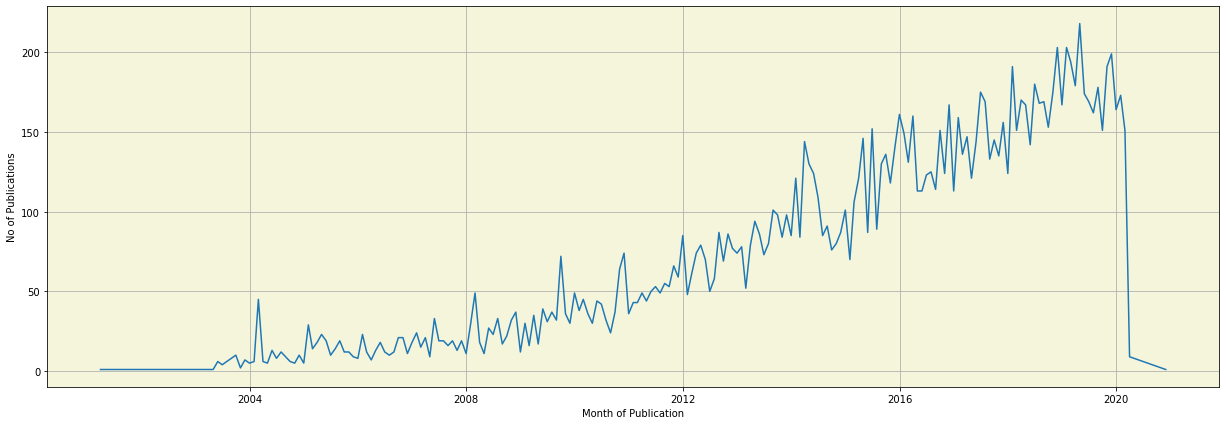

In [ ]:
plt.figure(figsize=(21,7))
plt.plot(temp_df.index,temp_df[0])
plt.axes().set_facecolor('#F5F5DC')
plt.grid()
plt.xlabel('Month of Publication')
plt.ylabel('No of Publications')
plt.show()

##**EDA**

In [ ]:
 df.dtypes

source_x                 object
title                    object
doi                      object
pubmed_id               float64
license                  object
abstract                 object
publish_time     datetime64[ns]
journal                  object
has_full_text            object
dtype: object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


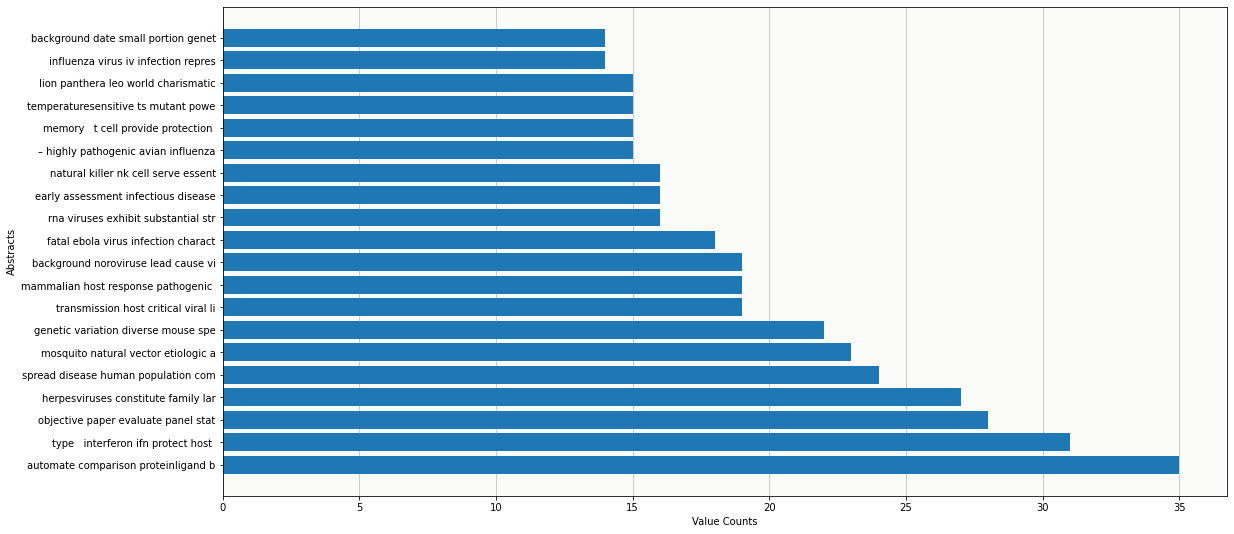

In [ ]:
xc = df['abstract'].value_counts().head(20)
y = xc.values
x = xc.index
x = [i[:35] for i in x]
plt.figure(figsize=(18,9))
plt.barh(x,y)
plt.xlabel('Value Counts')
plt.ylabel('Abstracts')
ax = plt.axes()
ax.xaxis.grid(color='silver')
ax.set_facecolor('#FBFCFA')
ax.set_axisbelow(True)
plt.show()

In [ ]:
len(pd.unique(df['abstract']))

11038

In [ ]:
len(pd.unique(df['title']))

11033

In [ ]:
df = df.T.drop_duplicates().T

In [ ]:
df.drop_duplicates(inplace=True)
df

,source_x,title,doi,pubmed_id,license,abstract,publish_time,journal,has_full_text
0,CZI,characteristic public health response coronavi...,10.3390/jcm9020575,3.20932e+07,cc-by,december case unidentified pneumonia history...,2020-01-01,J Clin Med,True
1,CZI,genome detective coronavirus type tool rapid i...,10.1093/bioinformatics/btaa145,3.21089e+07,cc-by-nc,summary genome detective webbase userfriendly ...,2020-01-01,"Bioinformatics (Oxford, England)",True
2,CZI,optimization method forecasting confirm case ...,10.3390/jcm9030674,3.21315e+07,cc-by,december novel coronavirus call discover w...,2020-01-01,J Clin Med,True
3,CZI,passenger destination china low risk novel cor...,10.1017/S0950268820000424,3.21007e+07,cc-by,novel coronavirus detect human week decembe...,2020-01-01,Epidemiol Infect,True
4,CZI,new coronavirus associate human respiratory di...,10.1038/s41586-020-2008-3,3.20155e+07,cc-by,emerge infectious disease sars zika present ma...,2020-01-01,Nature,True
...,...,...,...,...,...,...,...,...,...
15181,PMC,middle east respiratory syndrome coronavirus t...,http://dx.doi.org/10.3201/eid2602.190697,3.19613e+07,NO-CC CODE,middle east respiratory syndrome coronavirus m...,2020-02-01,Emerg Infect Dis,True
15182,PMC,middle east respiratory syndrome coronavirus t...,http://dx.doi.org/10.3201/eid2602.190697,3.19613e+07,NO-CC CODE,middle east respiratory syndrome coronavirus m...,2020-02-01,Emerg Infect Dis,False
15183,PMC,pseudoscience medicine cautionary recommendation,http://dx.doi.org/10.4314/ahs.v19i4.34,3.21279e+07,NO-CC CODE,introduction certain real life application sci...,2019-12-01,Afr Health Sci,True
15184,PMC,sample contribute complete genome sequence a...,http://dx.doi.org/10.1128/MRA.00067-20,3.21073e+07,NO-CC CODE,report complete genome sequence avian coronavi...,2020-02-27,Microbiol Resour Announc,True


In [ ]:
df.reset_index(inplace=True)
df = df.iloc[:,1:]
df

,source_x,title,doi,pubmed_id,license,abstract,publish_time,journal,has_full_text
0,CZI,characteristic public health response coronavi...,10.3390/jcm9020575,3.20932e+07,cc-by,december case unidentified pneumonia history...,2020-01-01,J Clin Med,True
1,CZI,genome detective coronavirus type tool rapid i...,10.1093/bioinformatics/btaa145,3.21089e+07,cc-by-nc,summary genome detective webbase userfriendly ...,2020-01-01,"Bioinformatics (Oxford, England)",True
2,CZI,optimization method forecasting confirm case ...,10.3390/jcm9030674,3.21315e+07,cc-by,december novel coronavirus call discover w...,2020-01-01,J Clin Med,True
3,CZI,passenger destination china low risk novel cor...,10.1017/S0950268820000424,3.21007e+07,cc-by,novel coronavirus detect human week decembe...,2020-01-01,Epidemiol Infect,True
4,CZI,new coronavirus associate human respiratory di...,10.1038/s41586-020-2008-3,3.20155e+07,cc-by,emerge infectious disease sars zika present ma...,2020-01-01,Nature,True
...,...,...,...,...,...,...,...,...,...
12691,PMC,middle east respiratory syndrome coronavirus t...,http://dx.doi.org/10.3201/eid2602.190697,3.19613e+07,NO-CC CODE,middle east respiratory syndrome coronavirus m...,2020-02-01,Emerg Infect Dis,True
12692,PMC,middle east respiratory syndrome coronavirus t...,http://dx.doi.org/10.3201/eid2602.190697,3.19613e+07,NO-CC CODE,middle east respiratory syndrome coronavirus m...,2020-02-01,Emerg Infect Dis,False
12693,PMC,pseudoscience medicine cautionary recommendation,http://dx.doi.org/10.4314/ahs.v19i4.34,3.21279e+07,NO-CC CODE,introduction certain real life application sci...,2019-12-01,Afr Health Sci,True
12694,PMC,sample contribute complete genome sequence a...,http://dx.doi.org/10.1128/MRA.00067-20,3.21073e+07,NO-CC CODE,report complete genome sequence avian coronavi...,2020-02-27,Microbiol Resour Announc,True


In [ ]:
df.shape

(12696, 9)

In [ ]:
df.groupby('license').size()


license
CC BY          9293
CC BY-NC       1051
CC BY-NC-ND     582
CC BY-NC-SA     227
CC BY-ND          3
CC0             285
NO-CC CODE     1229
cc-by            13
cc-by-nc          3
cc-by-nc-nd       8
cc-by-nc-sa       1
pd                1
dtype: int64

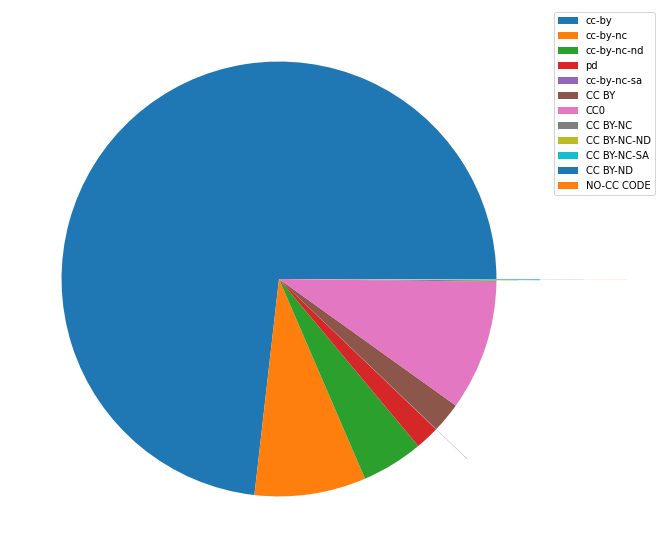

In [ ]:
plt.figure(figsize=(20,10))
ax = plt.axes()
ax.pie(df.groupby('license').size(),(0,0,0,0,0.2,0,0,0,0.1,0.2,0.4,0.6))
plt.legend(pd.unique(df['license'].values),loc='upper right',bbox_to_anchor=(1.2, 1))
plt.show()

In [ ]:
temp = df['journal'].value_counts().to_frame().reset_index()
print("Mean articles per Journal : ", temp['journal'].mean())
print("Variance : ", temp['journal'].var())
print("Standard Deviation : ",temp['journal'].std())

Mean articles per Journal :  11.195767195767196
Variance :  4435.534456912956
Standard Deviation :  66.59980823480618


In [ ]:
print("Journal with Least Number of Articles")
print("Journal : "+ temp.iloc[temp['journal'].idxmin()]['index'])
print("Count : ", temp.iloc[temp['journal'].idxmin()]['journal'])


Journal with Least Number of Articles
Journal : Sci Bull (Beijing)
Count :  1


In [ ]:
print("Journal with Most Number of Articles ")
print("Journal: "+ temp.iloc[temp['journal'].idxmax()]['index'])
print("Count : ", temp.iloc[temp['journal'].idxmax()]['journal'])

Journal with Most Number of Articles 
Journal: PLoS One
Count :  1731


In [ ]:
df

,source_x,title,doi,pubmed_id,license,abstract,publish_time,journal,has_full_text
0,CZI,characteristic public health response coronavi...,10.3390/jcm9020575,3.20932e+07,cc-by,december case unidentified pneumonia history...,2020-01-01,J Clin Med,True
1,CZI,genome detective coronavirus type tool rapid i...,10.1093/bioinformatics/btaa145,3.21089e+07,cc-by-nc,summary genome detective webbase userfriendly ...,2020-01-01,"Bioinformatics (Oxford, England)",True
2,CZI,optimization method forecasting confirm case ...,10.3390/jcm9030674,3.21315e+07,cc-by,december novel coronavirus call discover w...,2020-01-01,J Clin Med,True
3,CZI,passenger destination china low risk novel cor...,10.1017/S0950268820000424,3.21007e+07,cc-by,novel coronavirus detect human week decembe...,2020-01-01,Epidemiol Infect,True
4,CZI,new coronavirus associate human respiratory di...,10.1038/s41586-020-2008-3,3.20155e+07,cc-by,emerge infectious disease sars zika present ma...,2020-01-01,Nature,True
...,...,...,...,...,...,...,...,...,...
12691,PMC,middle east respiratory syndrome coronavirus t...,http://dx.doi.org/10.3201/eid2602.190697,3.19613e+07,NO-CC CODE,middle east respiratory syndrome coronavirus m...,2020-02-01,Emerg Infect Dis,True
12692,PMC,middle east respiratory syndrome coronavirus t...,http://dx.doi.org/10.3201/eid2602.190697,3.19613e+07,NO-CC CODE,middle east respiratory syndrome coronavirus m...,2020-02-01,Emerg Infect Dis,False
12693,PMC,pseudoscience medicine cautionary recommendation,http://dx.doi.org/10.4314/ahs.v19i4.34,3.21279e+07,NO-CC CODE,introduction certain real life application sci...,2019-12-01,Afr Health Sci,True
12694,PMC,sample contribute complete genome sequence a...,http://dx.doi.org/10.1128/MRA.00067-20,3.21073e+07,NO-CC CODE,report complete genome sequence avian coronavi...,2020-02-27,Microbiol Resour Announc,True


In [ ]:
df_grouped=df[['title','abstract']].groupby(by='title').agg(lambda x:' '.join(x))
df_grouped

,abstract
title,
,title pyrazolone derivative fivemembered rin...
polymorphism associate severity liver disease hivhcvcoinfected patient crosssectional study,mechanism involve chronic hepatitis c progress...
airway epithelium expression situ association detect fretclsm,background caveolae involve diverse cellular f...
amino acid reverse transcriptase human immunodeficiency critical protein stability,reverse transcriptase rt human immunodeficienc...
control integrin traffic early recycling endosome regulate integrindependent function,recycling endosome maintain plasma membrane ho...
...,...
′o methylation viral mrna cap evade host restriction ifit family member,cellular mrna high eukaryote viral rna methyla...
′terminal nucleotide bovine coronavirus defective interfere rna harbor cisacting element require negative positivestrand rna synthesis,synthesis negativestrand −strand complement ∼ ...
′triphosphaternaindependent activation rigi rna aptamer enhance antiviral activity,rigi cytosolic receptor nonself rna mediate im...


In [ ]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['abstract'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aaag,aaauagcaauua,aabb,aac,aag,aaha,aahig,aal,aamø,aapc,aapp,aaquatic,aare,aas,aastv,aastvs,aat,aatiixbai,aav,aavhbv,aavminibody,aavp,aavphage,aavpositive,aavs,aawhlivalapn,ab,aba,ababa,abacavir,abaecin,abandon,abandonment,abarheade,abasic,abate,abattoir,abbas,...,κhac,λa,λlc,λr,λs,μa,μcalpain,μg,μgg,μginoculum,μgkg,μgkgiv,μgl,μglminute,μgmg,μgml,μgmouse,μgμl,μl,μll,μlmin,μm,μml,μmoll,μns,μsm,μμ,οc,ρz,σa,σb,σns,το,φst,ωaminophosphonate,ωazidoalkylphosphonate,ωoxidase,ϕcorrelation,ⅰbase,吃亏是福
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
polymorphism associate severity liver disease hivhcvcoinfected patient crosssectional study,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
airway epithelium expression situ association detect fretclsm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
amino acid reverse transcriptase human immunodeficiency critical protein stability,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
control integrin traffic early recycling endosome regulate integrindependent function,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
′o methylation viral mrna cap evade host restriction ifit family member,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
′terminal nucleotide bovine coronavirus defective interfere rna harbor cisacting element require negative positivestrand rna synthesis,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
′triphosphaternaindependent activation rigi rna aptamer enhance antiviral activity,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from textblob import TextBlob
df['polarity']=df['abstract'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [ ]:
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['abstract']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 hepatitis e virus hev infection uncommonly cause chronic hepatitis neurologic disease describe case genotype   hev meningoencephalitis diagnose metagenomic nextgeneration sequence illustrate power unbiased molecular approach microbial testing report case hev infection presumably acquire lung transplantation
Review 2:
 noroviruses novs lead cause acute gastroenteritis worldwide nov    protein express recombinant baculovirus system   insect cell method purification concentration viruslike particle vlp evaluate electron microscopy -PRON- histoblood group antigen hbga binding assay show repeat sucrose gradient purification follow ultrafiltration result intact vlp excellent bind h type   antigen vlps stable   month ° c   day ambient temperature finding indicate method yield stable highquality vlps
Review 3:
 report fullgenome sequence bovine coronavirus bcov isolate dairy calf pennsylvania obtain     bcov pathogen great importance cattle he

In [ ]:
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['abstract']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 mrna contexts contain ' slippery ' sequence downstream secondary structure element stall progression ribosome mrna induce movement − reading frame study build thermodynamic model base bayesian statistic explain − program ribosome frameshifting work training set model measure frameshifting efficiency   dnax mrna sequence variant vitro   publish vivo efficiency obtain freeenergy difference mrnatrna base pair   − frame frameshifting efficiency give sequence reproduce predict trna−mrna base pair frame result explain modification trna anticodon modulate frameshifting ribosome tune strength basepair interaction
Review 2:
 mrna contexts contain ' slippery ' sequence downstream secondary structure element stall progression ribosome mrna induce movement − reading frame study build thermodynamic model base bayesian statistic explain − program ribosome frameshifting work training set model measure frameshifting efficiency   dnax mrna sequence vari

In [ ]:
df

,source_x,title,doi,pubmed_id,license,abstract,publish_time,journal,has_full_text,polarity
0,CZI,characteristic public health response coronavi...,10.3390/jcm9020575,3.20932e+07,cc-by,december case unidentified pneumonia history...,2020-01-01,J Clin Med,True,0.066250
1,CZI,genome detective coronavirus type tool rapid i...,10.1093/bioinformatics/btaa145,3.21089e+07,cc-by-nc,summary genome detective webbase userfriendly ...,2020-01-01,"Bioinformatics (Oxford, England)",True,0.175924
2,CZI,optimization method forecasting confirm case ...,10.3390/jcm9030674,3.21315e+07,cc-by,december novel coronavirus call discover w...,2020-01-01,J Clin Med,True,-0.036174
3,CZI,passenger destination china low risk novel cor...,10.1017/S0950268820000424,3.21007e+07,cc-by,novel coronavirus detect human week decembe...,2020-01-01,Epidemiol Infect,True,-0.063690
4,CZI,new coronavirus associate human respiratory di...,10.1038/s41586-020-2008-3,3.20155e+07,cc-by,emerge infectious disease sars zika present ma...,2020-01-01,Nature,True,0.033246
...,...,...,...,...,...,...,...,...,...,...
12691,PMC,middle east respiratory syndrome coronavirus t...,http://dx.doi.org/10.3201/eid2602.190697,3.19613e+07,NO-CC CODE,middle east respiratory syndrome coronavirus m...,2020-02-01,Emerg Infect Dis,True,0.041900
12692,PMC,middle east respiratory syndrome coronavirus t...,http://dx.doi.org/10.3201/eid2602.190697,3.19613e+07,NO-CC CODE,middle east respiratory syndrome coronavirus m...,2020-02-01,Emerg Infect Dis,False,0.041900
12693,PMC,pseudoscience medicine cautionary recommendation,http://dx.doi.org/10.4314/ahs.v19i4.34,3.21279e+07,NO-CC CODE,introduction certain real life application sci...,2019-12-01,Afr Health Sci,True,0.085034
12694,PMC,sample contribute complete genome sequence a...,http://dx.doi.org/10.1128/MRA.00067-20,3.21073e+07,NO-CC CODE,report complete genome sequence avian coronavi...,2020-02-27,Microbiol Resour Announc,True,-0.133333


In [ ]:
df_new = df[['title', 'abstract']].copy()


In [ ]:
df_new

,title,abstract
0,characteristic public health response coronavi...,december case unidentified pneumonia history...
1,genome detective coronavirus type tool rapid i...,summary genome detective webbase userfriendly ...
2,optimization method forecasting confirm case ...,december novel coronavirus call discover w...
3,passenger destination china low risk novel cor...,novel coronavirus detect human week decembe...
4,new coronavirus associate human respiratory di...,emerge infectious disease sars zika present ma...
...,...,...
12691,middle east respiratory syndrome coronavirus t...,middle east respiratory syndrome coronavirus m...
12692,middle east respiratory syndrome coronavirus t...,middle east respiratory syndrome coronavirus m...
12693,pseudoscience medicine cautionary recommendation,introduction certain real life application sci...
12694,sample contribute complete genome sequence a...,report complete genome sequence avian coronavi...


In [ ]:
df_new.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)


In [ ]:
df_new

,title,abstract
0,characteristic public health response coronavi...,december case unidentified pneumonia history...
1,genome detective coronavirus type tool rapid i...,summary genome detective webbase userfriendly ...
2,optimization method forecasting confirm case ...,december novel coronavirus call discover w...
3,passenger destination china low risk novel cor...,novel coronavirus detect human week decembe...
4,new coronavirus associate human respiratory di...,emerge infectious disease sars zika present ma...
...,...,...
12690,porcine deltacoronavirus infection transmissio...,coronaviruse cause respiratory gastrointestina...
12691,middle east respiratory syndrome coronavirus t...,middle east respiratory syndrome coronavirus m...
12693,pseudoscience medicine cautionary recommendation,introduction certain real life application sci...
12694,sample contribute complete genome sequence a...,report complete genome sequence avian coronavi...


In [ ]:
df_new['new_text'] = df_new['title'].apply(lambda x: list(nlp(x).ents)) 


In [ ]:
df_new['abstract'][2]

'december   novel coronavirus call   discover wuhan china spread different city china   country number confirm case increase daily reach     february   current study present new forecasting model estimate forecast number confirm case   upcoming day base previously confirm case record china propose model improved adaptive neurofuzzy inference system anfi enhanced flower pollination algorithm fpa salp swarm algorithm ssa general ssa employ improve fpa avoid drawback ie get trap local optima main idea propose model call fpassaanfis improve performance anfis determine parameter anfi fpassa fpassaanfis model evaluate world health organization official datum outbreak   forecast confirm case upcoming day fpassaanfis model compare exist model show well performance term mean absolute percentage error mape root mean squared relative error rmsre root mean squared relative error rmsre coefficient determination   r    compute time furthermore test propose model different dataset weekly influenza co

In [ ]:
import spacy 
from spacy import displacy
nlp=spacy.load('en_core_web_sm')
doc = nlp(u'december   case unidentified pneumonia history exposure huanan seafood market report wuhan hubei province novel coronavirus   identify accountable disease humantohuman transmission confirm disease name   world health organization spread rapidly country world   february   number confirm case reach     fatality   result low casefatality rate   confirm case compare severe acute respiratory syndrome sars middle east respiratory syndrome mer symptom composition   fatality case collect release official report fever cough short breath chest tightnesspain major comorbiditie fatality case include hypertension diabete coronary heart disease cerebral infarction chronic bronchitis source virus pathogenesis disease unconfirmed specific therapeutic drug find chinese government initiate   public health response prevent spread disease crucial speed development vaccine drug treatment enable defeat   soon possible')

displacy.render(doc, style='ent', jupyter=True)

In [ ]:
nlp.pipe_names

['tagger', 'parser', 'ner']

In [ ]:
train = [

("novel coronavirus identify accountable disease human to human",{"entities":[(6,17,"VIRUS")]}),
("case unidentified pneumonia history exposure",{"entities":[(18,27,"VIRUS")]}),
("fever cough short breath chest tightness pain major comorbiditie chronic bronchitis source virus pathogenesis disease ",{"entities":[(0,5,"ILLNESS"),(6,11,'ILLNESS')]}),
("vaccine drug treatment enable defeat soon possible",{"entities":[(0,7,"CURE"),(8,12,'CURE')]}),

("yellow fever virus brazil present genome detective coronavirus",{"entities":[(0,12,"CURE"),(34,40,'GENE'),(51,62,"VIRUS")]}),
("coronavirus sequence isolate china world",{"entities":[(0,11,"VIRUS")]}),
("Coronavirus is a new germ around us that is making some people sick with an illness called COVID-19.",{"entities":[(91,99,"VIRUS")]}),
("Coronaviridae of large single-stranded RNA viruses that have a lipid envelope studded with club-shaped spike",{"entities":[(0,13,"VIRUS")]}),
("People who get sick may have a cough, a fever, a sore throat or feel like they are having a hard time breathing.",{"entities":[(31,36,"ILLNESS"),(40,45,"ILLNESS")]}),
("Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans and birds, they cause respiratory tract infections that can range from mild to lethal.",{"entities":[(0,13,"VIRUS")]}),

("Mild illnesses in humans include some cases of the common cold (which is also caused by other viruses",{"entities":[(58,62,"ILLNESS")]}),

("predominantly rhinoviruses, while more lethal varieties can cause SARS, MERS and COVID-19.",{"entities":[(81,89,"VIRUS")]}),
("In cows and pigs they cause diarrhea, while in mice they cause hepatitis and encephalomyelitis.",{"entities":[(3,7,"ANIMAL"),(12,16,"ANIMAL"),(28,36,"ILLNESS"),(63,72,"ILLNESS"),(77,94,"ILLNESS")]}),
("Coronaviruses constitute the subfamily Orthocoronavirinae, in the family Coronaviridae",{"entities":[(0,13,"VIRUS"),(39,57,"VIRUS"),(73,86,"VIRUS")]}),
("order Nidovirales and realm Riboviria.They are enveloped viruses ",{"entities":[(6,17,"VIRUS"),(28,37,"VIRUS")]}),
("with a positive-sense single-stranded RNA genome and a nucleocapsid of helical symmetry.",{"entities":[(42,48,"GENE")]}),
("The genome size of coronaviruses ranges from approximately 26 to 32 kilobases",{"entities":[(4,10,"GENE"),(19,32,"VIRUS")]}),
]

In [ ]:
ner=nlp.get_pipe("ner")

In [ ]:
for _,annotations in train:
  for ent in annotations.get("entities"):
    ner.add_label(ent[2])

In [ ]:
disable_pipes=[pipe for pipe in nlp.pipe_names if pipe !='ner']

In [ ]:
import random
from spacy.util import minibatch,compounding
from pathlib import Path

with nlp.disable_pipes(*disable_pipes):
  optimizer=nlp.resume_training()

  for iteration in range(100):

    random.shuffle(train)
    losses={}

    batches=minibatch(train , size=compounding(1.0,4.0,1.001))
    for batch in batches:
      text,annotation = zip(*batch)
      nlp.update(
            text,
            annotation,
            drop=0.5,
            losses=losses,
            sgd=optimizer
          )
      print("losses",losses)

    

losses {'ner': 41.17948809243917}
losses {'ner': 60.144716514368916}
losses {'ner': 69.01680878083926}
losses {'ner': 75.9712427460955}
losses {'ner': 79.891959383485}
losses {'ner': 106.81419616874217}
losses {'ner': 123.61106264527797}
losses {'ner': 133.96113006520926}
losses {'ner': 153.24603352305076}
losses {'ner': 165.09160570224327}
losses {'ner': 183.30437154256396}
losses {'ner': 206.94944463155588}
losses {'ner': 227.25282171840058}
losses {'ner': 239.77371061470865}
losses {'ner': 256.07670213128347}
losses {'ner': 262.1587741153684}
losses {'ner': 267.60092525579}
losses {'ner': 16.60693686047636}
losses {'ner': 23.839849303199735}
losses {'ner': 45.824564823604014}
losses {'ner': 52.57155653351622}
losses {'ner': 74.6223923720708}
losses {'ner': 82.23605425733234}
losses {'ner': 102.02645852186009}
losses {'ner': 134.97570507448842}
losses {'ner': 146.2105976557287}
losses {'ner': 163.87068431163067}
losses {'ner': 189.68267564193508}
losses {'ner': 199.71285591216298}
lo

In [ ]:
from spacy import displacy
doc=nlp("i fever suffering from coronavirus")
for ent in doc.ents:
  print(ent.text,ent.start_char,ent.end_char,ent.label_)
displacy.render(nlp(doc.text),style='ent',jupyter=True)

coronavirus 23 34 VIRUS


In [ ]:
df_.columns = df_.iloc[0]

df_ = df_[1:]

df_.columns = ['Sentence #','Word','POS','Tag']

df_ = df_.reset_index(drop=True)

df_.head()

,Sentence #,Word,POS,Tag
0,NaN,of,IN,O
1,NaN,demonstrators,NNS,O
2,NaN,have,VBP,O
3,NaN,marched,VBN,O
4,NaN,through,IN,O


In [ ]:
df_ = df_.rename(columns={"Sentence #": "sentence#"})


In [ ]:
data = df_[df_['sentence#'].notnull()]

In [ ]:
class getsentence(object):
    
    def __init__(self, data):
        self.n_sent = 1.0
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("sentence#").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [ ]:
getter = getsentence(data)


In [ ]:
sentences = getter.sentences
#ths is how a sentence will look like.
print(sentences[1])


[('Helicopter', 'NN', 'O')]


In [ ]:
maxlen = max([len(s) for s in sentences])
print ('Maximum sentence length:', maxlen)

Maximum sentence length: 1


In [ ]:
data.loc[data['Tag'] == 'B-org', 'Word'].head()

1371    Halliburton
1482            VOA
1623           ABAC
1682           ABAC
1800           ABAC
Name: Word, dtype: object

In [ ]:
data.loc[data['Tag'] == 'I-org', 'Word'].head()


Series([], Name: Word, dtype: object)

In [ ]:
data.loc[data['Tag'] == 'B-per', 'Word'].head()


1296        Khan
1531         Tim
1711    Harcourt
1860     Foreign
1890         Mr.
Name: Word, dtype: object

In [ ]:
data.loc[data['Tag'] == 'I-per', 'Word'].head()


Series([], Name: Word, dtype: object)

In [ ]:
data.loc[data['Tag'] == 'B-geo', 'Word'].head()


617        Mosul
2589      Russia
3316    Pakistan
3747        U.S.
4819       Japan
Name: Word, dtype: object

In [ ]:
data.loc[data['Tag'] == 'I-geo', 'Word'].head()


Series([], Name: Word, dtype: object)

In [ ]:
data.loc[data['Tag'] == 'O', 'Word'].head()


23     Families
53         They
67       Police
82          The
107         The
Name: Word, dtype: object

NER USING CRF

The goal of a named entity recognition (NER) system is to identify all textual mentions of the named entities. This can be broken down into two sub-tasks: identifying the boundaries of the NE, and identifying its type.

Named entity recognition is a task that is well-suited to the type of classifier-based approach. In particular, a tagger can be built that labels each word in a sentence using the IOB format, where chunks are labelled by their appropriate type.

 The IOB Tagging system contains tags of the form:
* **B** - {CHUNK_TYPE} – for the word in the Beginning chunk
* **I** - {CHUNK_TYPE} – for words Inside the chunk
* **O** – Outside any chunk



In [ ]:
#Data analysis
import pandas as pd
import numpy as np
#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#Modeling
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
# from sklearn_crfsuite import CRF, scorers, metrics
# import sklearn_crfsuite
# from sklearn_crfsuite import scorers
# from sklearn_crfsuite import metrics
# from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import scipy.stats
import eli5

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df_ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ner_dataset_cov.csv',encoding="latin1")

In [ ]:
#The dataset does not have any header currently. We can use the first row as a header as it has the relevant headings.
#We will make the first row as the heading, remove the first row and re-index the dataset

df_.columns = df_.iloc[0]

df_ = df_[1:]

df_.columns = ['Sentence #','Word','POS','Tag']

df_ = df_.reset_index(drop=True)

df_.head()


,Sentence #,Word,POS,Tag
0,NaN,of,IN,O
1,NaN,demonstrators,NNS,O
2,NaN,have,VBP,O
3,NaN,marched,VBN,O
4,NaN,through,IN,O


In [ ]:
df_ = df_.rename(columns={"Sentence #": "sentence#"})

In [ ]:
df_.head()

,sentence#,Word,POS,Tag
0,NaN,of,IN,O
1,NaN,demonstrators,NNS,O
2,NaN,have,VBP,O
3,NaN,marched,VBN,O
4,NaN,through,IN,O


In [ ]:
df_.shape

(1048574, 4)

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentence#  47958 non-null    object
 1   Word       1048574 non-null  object
 2   POS        1048574 non-null  object
 3   Tag        1048574 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


In [ ]:
#so we are basically having only those rows where sentence column is not null
data = df_[df_['sentence#'].notnull()]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47958 entries, 23 to 1048566
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence#  47958 non-null  object
 1   Word       47958 non-null  object
 2   POS        47958 non-null  object
 3   Tag        47958 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


## Exploring / Visualizing our data

Before going further, we will try to understand what the dataset is all about and what all the features mean. This is important in order to understand how the classifiers will perform and help us interpret the results.

In [ ]:
data.head()

,sentence#,Word,POS,Tag
23,Sentence: 2,Families,NNS,O
53,Sentence: 3,They,PRP,O
67,Sentence: 4,Police,NNS,O
82,Sentence: 5,The,DT,O
107,Sentence: 6,The,DT,O


The dataset has the following columns or features -

* **Index -** Index numbers for each word [Numeric type]
* **Sentence #** - The number of sentences in the dataset (We will find the number of sentences below) [Numeric type]
* **Word -** The words in the sentence [Character type]
* **POS -** Parts Of Speech tags, these are tags given to the type of words as per the Penn TreeBank Tagset [Categorical type]
* **Tag -**The tags given to each word based on the IOB tagging system described above (Target variable) [Categorical type]

In [ ]:
# A class to retrieve the sentences from the dataset
class getsentence(object):
    
    def __init__(self, data):
        self.n_sent = 1.0
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("sentence#").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [ ]:
data.head()

,sentence#,Word,POS,Tag
23,Sentence: 2,Families,NNS,O
53,Sentence: 3,They,PRP,O
67,Sentence: 4,Police,NNS,O
82,Sentence: 5,The,DT,O
107,Sentence: 6,The,DT,O


In [ ]:
getter = getsentence(data)

In [ ]:
sentences = getter.sentences
#ths is how a sentence will look like.
print(sentences[1])

[('Helicopter', 'NN', 'O')]


In [ ]:
#Lets find the number of words in the dataset
words = list(set(data["Word"].values))
n_words = len(words)
print(n_words)

3798


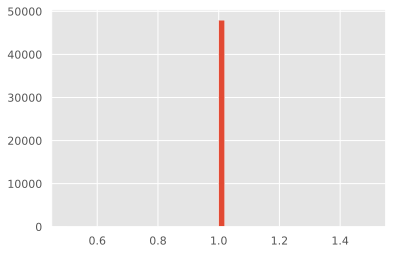

In [ ]:
#Lets visualize how the sentences are distributed by their length
plt.style.use("ggplot")
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

so this is dataset is for learning purpose there we are having a same length of sentence

In [ ]:
#Lets find out the longest sentence length in the dataset
maxlen = max([len(s) for s in sentences])
print ('Maximum sentence length:', maxlen)

Maximum sentence length: 1


Now that we know the words and sentences, lets try to understand what sort of words each tag contains. This will help us in understanding what each tag type and sub-type represents.

In [ ]:
#Words tagged as B-org
data.loc[data['Tag'] == 'B-org', 'Word'].head()

1371    Halliburton
1482            VOA
1623           ABAC
1682           ABAC
1800           ABAC
Name: Word, dtype: object

In [ ]:
#Words tagged as I-org
data.loc[data['Tag'] == 'I-org', 'Word'].head()

Series([], Name: Word, dtype: object)

In [ ]:
#Words tagged as B-per
data.loc[data['Tag'] == 'B-per', 'Word'].head()

1296        Khan
1531         Tim
1711    Harcourt
1860     Foreign
1890         Mr.
Name: Word, dtype: object

In [ ]:
#Words tagged as I-per
data.loc[data['Tag'] == 'I-per', 'Word'].head()

Series([], Name: Word, dtype: object)

In [ ]:
#Words tagged as B-geo
data.loc[data['Tag'] == 'B-geo', 'Word'].head()


617        Mosul
2589      Russia
3316    Pakistan
3747        U.S.
4819       Japan
Name: Word, dtype: object

In [ ]:
#Words tagged as I-geo
data.loc[data['Tag'] == 'I-geo', 'Word'].head()

Series([], Name: Word, dtype: object)

In [ ]:
#Words tagged as I-geo
data.loc[data['Tag'] == 'O', 'Word'].head()

23     Families
53         They
67       Police
82          The
107         The
Name: Word, dtype: object

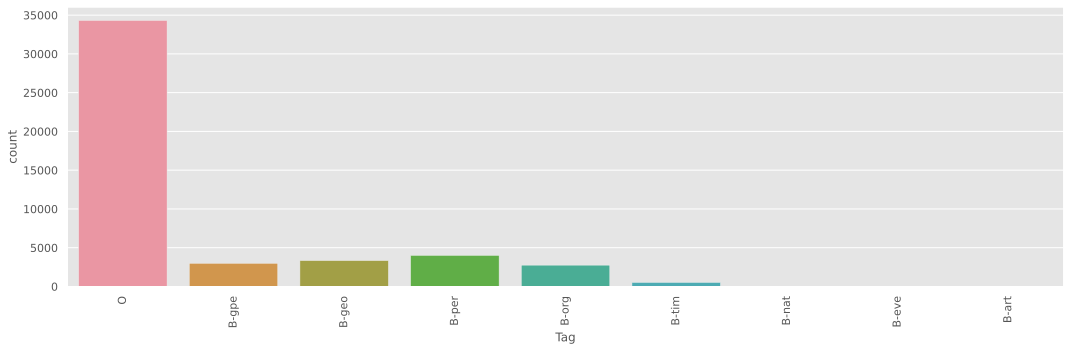

In [ ]:
#Words distribution across Tags
plt.figure(figsize=(15, 5))
ax = sns.countplot('Tag', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

Quite surprising, most of the words are tagged as outside of any chunk. These words can be considered as fillers and their presence might impact the classifier performance as well. Lets check the dataset again without the O tags.

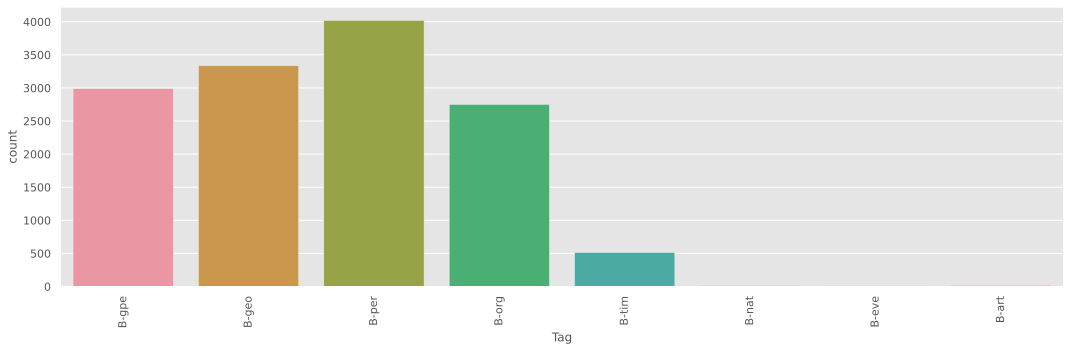

In [ ]:
#Words distribution across Tags without O tag
plt.figure(figsize=(15, 5))
ax = sns.countplot('Tag', data=data.loc[data['Tag'] != 'O'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

> So our dataset mostly contains words related to `geopolitical entities`, `geographical locations` and `person names`.

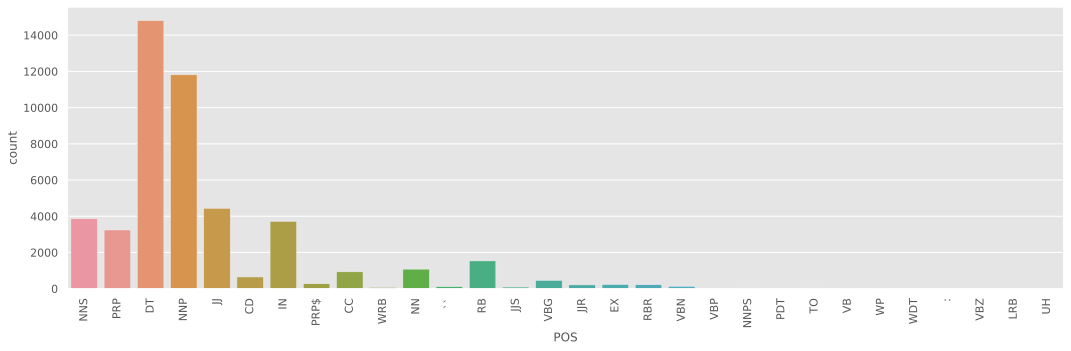

In [ ]:
#Words distribution across POS
plt.figure(figsize=(15, 5))
ax = sns.countplot('POS', data=data, orient='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## **Modeling the Data**

With the basic EDA done and understanding the dataset, we can move to the modeling stage.
Since the problem statement is a simple classification problem, we will start with a simple tree based model, Random Forest using a simple feature map.
Simple tree based models have been proven to provide decent performance in building NERC systems. Random Forest being one of the most popular tree based models can learn the underlying rules according to which terms are tagged. It is important that the classifier has proper features fed in to improve the performance.

### Random Forest Classifier

In [ ]:
#Simple feature map to feed arrays into the classifier. 
def feature_map(word):
    return np.array([word.istitle(), word.islower(), word.isupper(), len(word),
                     word.isdigit(),  word.isalpha()])

In [ ]:
#We divide the dataset into train and test sets
words = [feature_map(w) for w in data["Word"].values.tolist()]
tags = data["Tag"].values.tolist()

In [ ]:
#Lets see how the input array looks like
print(words[:5])

[array([1, 0, 0, 8, 0, 1]), array([1, 0, 0, 4, 0, 1]), array([1, 0, 0, 6, 0, 1]), array([1, 0, 0, 3, 0, 1]), array([1, 0, 0, 3, 0, 1])]


We will use 5 fold cross validation as an input parameter to the classifier, i.e. we will divide the dataset into 5 subsets and train-test on them. Some models like decision trees and neural networks are often be able to get 100% accuracy on the training data, but perform much worse on new data. Therefore, we will train on one subset and test on the other, and repeat for every subset so that the classifier classifies correctly on average and the performance estimate is not overly optimistic

In [ ]:
#Random Forest classifier
pred = cross_val_predict(RandomForestClassifier(n_estimators=20),X=words, y=tags, cv=5)

In [ ]:
#Lets check the performance 
from sklearn.metrics import classification_report
report = classification_report(y_pred=pred, y_true=tags)
print(report)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        18
       B-eve       0.00      0.00      0.00        10
       B-geo       0.52      0.10      0.16      3335
       B-gpe       0.00      0.00      0.00      2989
       B-nat       0.00      0.00      0.00        11
       B-org       0.79      0.20      0.32      2752
       B-per       0.98      0.39      0.56      4019
       B-tim       0.00      0.00      0.00       515
           O       0.76      1.00      0.86     34309

    accuracy                           0.76     47958
   macro avg       0.34      0.19      0.21     47958
weighted avg       0.71      0.76      0.69     47958



### Conditional Random Fields classifier

A Conditional Random Field (CRF) is a standard model for predicting the most likely sequence of labels that correspond to a sequence of inputs. It is a supervised learning method which has been proven to be better than the tree based models when it comes to NER. Whereas a discrete classifier predicts a label for a single sample without considering "neighboring" samples, a CRF can take context into account; e.g., the linear chain CRF (which is popular in natural language processing) predicts sequences of labels for sequences of input samples.

In [ ]:
!pip install sklearn-crfsuite

     |████████████████████████████████| 743 kB 9.4 MB/s 


In [ ]:
from itertools import chain

import nltk
import sklearn
import scipy.stats

import sklearn_crfsuite
from sklearn_crfsuite import scorers,CRF
from sklearn_crfsuite.metrics import flat_classification_report
from sklearn_crfsuite import metrics

In [ ]:
# Feature set
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
        'postag[:2]': postag[:2],
    }
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True

    return features

In [ ]:
def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, postag, label in sent]

In [ ]:
#Creating the train and test set
X = [sent2features(s) for s in sentences]
y = [sent2labels(s) for s in sentences]

In [ ]:
#Creating the CRF model
crf = CRF(algorithm='lbfgs',
          c1=0.1,
          c2=0.1,
          max_iterations=100,
          all_possible_transitions=False)

In [ ]:
#We predcit using the same 5 fold cross validation
pred = cross_val_predict(estimator=crf, X=X, y=y, cv=5)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


In [ ]:
#Lets evaluate the mode
report = flat_classification_report(y_pred=pred, y_true=y)
print(report)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


              precision    recall  f1-score   support

       B-art       0.33      0.11      0.17        18
       B-eve       0.00      0.00      0.00        10
       B-geo       0.74      0.86      0.80      3335
       B-gpe       0.95      0.90      0.92      2989
       B-nat       0.88      0.64      0.74        11
       B-org       0.69      0.51      0.58      2752
       B-per       0.83      0.88      0.85      4019
       B-tim       0.96      0.75      0.84       515
           O       0.98      0.99      0.98     34309

    accuracy                           0.93     47958
   macro avg       0.71      0.63      0.65     47958
weighted avg       0.93      0.93      0.93     47958



In [ ]:
#Tuning the parameters manually, setting c1 = 10
crf2 = CRF(algorithm='lbfgs',
          c1=10,
          c2=0.1,
          max_iterations=100,
          all_possible_transitions=False)

In [ ]:
pred = cross_val_predict(estimator=crf2, X=X, y=y, cv=5)
report = flat_classification_report(y_pred=pred, y_true=y)
print(report)

              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        18
       B-eve       0.00      0.00      0.00        10
       B-geo       0.74      0.75      0.74      3335
       B-gpe       0.93      0.84      0.88      2989
       B-nat       0.00      0.00      0.00        11
       B-org       0.74      0.37      0.50      2752
       B-per       0.63      0.91      0.75      4019
       B-tim       1.00      0.71      0.83       515
           O       0.98      0.98      0.98     34309

    accuracy                           0.91     47958
   macro avg       0.56      0.51      0.52     47958
weighted avg       0.91      0.91      0.91     47958



## **Conclusion**

**Random Forest Classifier**

Although we have a good average score, the Random Forest Classifier model performed quite badly. The precision and recall values of most of the classes were 0. It seems the features which require the model to take proper decisions are missing. The model is basically memorizing words and tags, which will not suffice. The context information behind each word needs to be fed to the model as well so that the predictions are more accurate.
We can either work on this model alone by improving the features or ensembling it with a more contextual model, or use a different model altogether.

**CRF**

Compared to the Random Forest classifier, the CRF classifier did better as the scores have improved. 
However, the precision and recall metrics of the classes individually have improved but not much. Maybe the model is again remembering words and not taking into the context information completely. We will try tuning the model manually to see if we can improve it.

**Spacy**

Well the accuracy scores of the model implemented through spacy has underachieved , but we were able to succeed in naming our own entities which we weren't able to perform using CRF & Random Forest Classifier , however the accuracy scores can be improved in many ways.